### **Import Library + Supervised Learning**

In [63]:
import pandas as pd # untuk memasukkan dataset ke dataframe
import seaborn as sns # untuk mempercantik visualisasi
import matplotlib.pyplot as plt # untuk menggambar grafik
from sklearn.model_selection import train_test_split # untuk membagi training dan testing
from sklearn.tree import DecisionTreeClassifier # kita pakai decision Tree
import numpy as np # digunakan untuk operasi matematika
from sklearn.pipeline import Pipeline # digunakan untuk mencegah nilai nya bocor
from sklearn.model_selection import GridSearchCV # digunakan untuk mendapatkan parameter optimal
# untuk melihat score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

### **Persiapan Data**

In [64]:
df =pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

In [65]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [68]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [69]:
df.shape

(1599, 12)

In [70]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

In [71]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

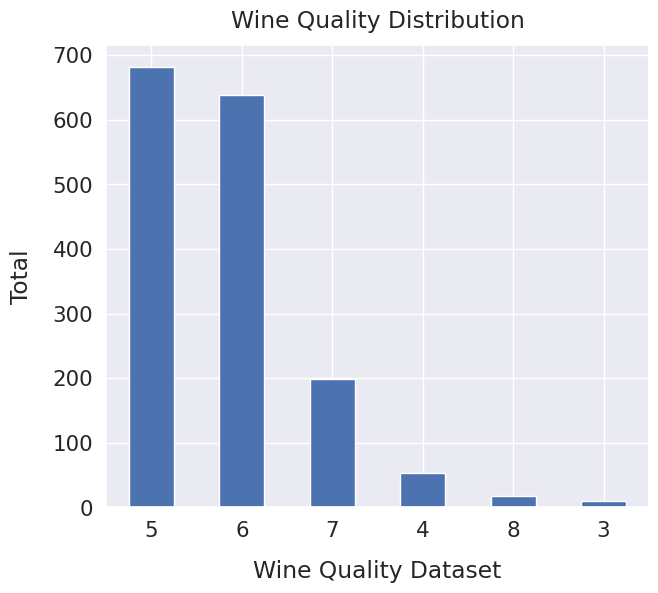

In [72]:
sns.set(font_scale=1.4)
df['quality'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Wine Quality Dataset", labelpad=14)
plt.ylabel("Total", labelpad=14)
plt.title("Wine Quality Distribution", y=1.02);

In [73]:
df = df.drop_duplicates()

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


In [75]:
df = df.loc[:,df.apply(pd.Series.nunique) != 1]

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


### **Pemodelan**

In [77]:
X = df.drop(['quality'], axis=1)

In [78]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [79]:
y = df['quality']

In [80]:
y

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.1, random_state=42)

Decision Tree (DT)

In [82]:
# untuk decision tree
parameters_dt = {
                "model__max_depth": np.arange(1,20,10),
                "model__min_samples_leaf": np.arange(1,20,2),
                "model__min_samples_split": np.arange(2,11),
                "model__criterion": ['gini','entropy'],
                "model__random_state": [42]
}

In [83]:
classifier_dt_pipeline = Pipeline([
                          ('model',DecisionTreeClassifier()),
                          ])

Support Vector Machine (SVM)

In [84]:
parameters_svm = {
                    "model__kernel":['linear','rbf'],
}

In [85]:
classifier_svm_pipeline = Pipeline([
                          ('model',SVC()),
                          ])

K-Nearest Neighbor (KNN)

In [86]:
parameters_knn = {
    "model__n_neighbors": np.arange(2,32,2)
}

In [87]:
classifier_knn_pipeline = Pipeline([
                          ('model',KNeighborsClassifier()),
                          ])

Naive Bayes (NB)

In [88]:
parameters_nb = {
    "model__alpha": np.arange(0,1.1,0.1)
}

In [89]:
classifier_nb_pipeline = Pipeline([
                          ('model',MultinomialNB()),
                          ])

### **Mencari Parameter Optimal**

Decision Tree (DT)

In [90]:
ori_classifier_dt = GridSearchCV(classifier_dt_pipeline, parameters_dt, cv=3, n_jobs=-1)

In [91]:
ori_classifier_dt.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'model__criterion': ['gini', 'entropy'],
                         'model__max_depth': array([ 1, 11]),
                         'model__min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'model__min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'model__random_state': [42]})

In [92]:
ori_classifier_dt.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(criterion='entropy', max_depth=11,
                                        min_samples_leaf=15,
                                        random_state=42))])

In [93]:
for param_name in sorted(parameters_dt.keys()):
    print('%s: %r' %(param_name,ori_classifier_dt.best_params_[param_name]))

model__criterion: 'entropy'
model__max_depth: 11
model__min_samples_leaf: 15
model__min_samples_split: 2
model__random_state: 42


In [94]:
ori_y_pred_dt_train = ori_classifier_dt.predict(X_train)

ori_accuracy_dt_train = accuracy_score(Y_train,ori_y_pred_dt_train)
print('Akurasi pada training set: ', ori_accuracy_dt_train)

ori_precision_dt_train = precision_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Precision pada training set: ', ori_precision_dt_train)

ori_recall_dt_train = recall_score(Y_train,ori_y_pred_dt_train, average='micro')
print('Recall pada training set: ', ori_recall_dt_train)

ori_y_pred_dt_test = ori_classifier_dt.predict(X_test)

ori_accuracy_dt_test = accuracy_score(Y_test,ori_y_pred_dt_test)
print('Akurasi pada test set: ', ori_accuracy_dt_test)

ori_precision_dt_test = precision_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Precision pada test set: ', ori_precision_dt_test)

ori_recall_dt_test = recall_score(Y_test,ori_y_pred_dt_test, average='micro')
print('Recall pada test set: ', ori_recall_dt_test)

Akurasi pada training set:  0.6631234668847097
Precision pada training set:  0.6631234668847097
Recall pada training set:  0.6631234668847097
Akurasi pada test set:  0.6176470588235294
Precision pada test set:  0.6176470588235294
Recall pada test set:  0.6176470588235294


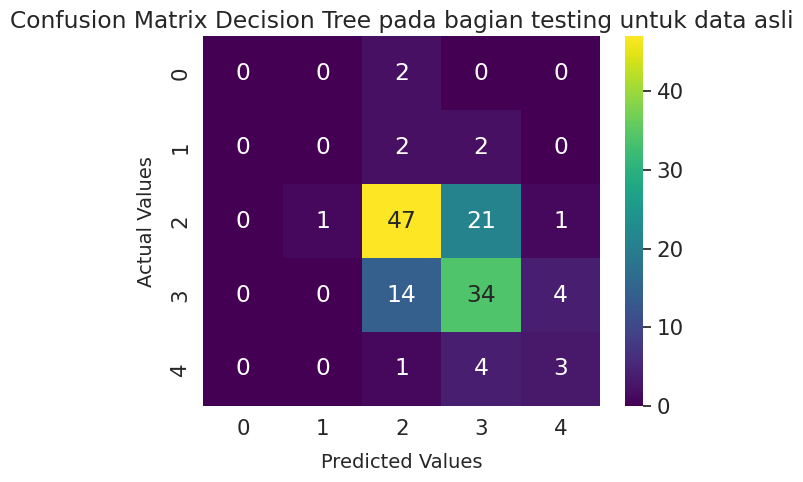

In [95]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_dt_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix Decision Tree pada bagian testing untuk data asli')
plt.show()

Support Vector Machine (SVM)

In [96]:
ori_classifier_svm = GridSearchCV(classifier_svm_pipeline, parameters_svm, cv=3, n_jobs=-1)

In [97]:
ori_classifier_svm.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', SVC())]), n_jobs=-1,
             param_grid={'model__kernel': ['linear', 'rbf']})

In [98]:
ori_classifier_svm.best_estimator_

Pipeline(steps=[('model', SVC(kernel='linear'))])

In [99]:
for param_name in sorted(parameters_svm.keys()):
    print('%s: %r' %(param_name,ori_classifier_svm.best_params_[param_name]))

model__kernel: 'linear'


In [100]:
ori_y_pred_svm_train = ori_classifier_svm.predict(X_train)

In [101]:
ori_accuracy_svm_train = accuracy_score(Y_train,ori_y_pred_svm_train)
print('Akurasi pada training set: ', ori_accuracy_svm_train)

ori_precision_svm_train = precision_score(Y_train,ori_y_pred_svm_train, average='micro')
print('Precision pada training set: ', ori_precision_svm_train)

ori_recall_svm_train = recall_score(Y_train,ori_y_pred_svm_train, average='micro')
print('Recall pada training set: ', ori_recall_svm_train)

ori_y_pred_svm_test = ori_classifier_svm.predict(X_test)

ori_accuracy_svm_test = accuracy_score(Y_test,ori_y_pred_svm_test)
print('Akurasi pada test set: ', ori_accuracy_svm_test)

ori_precision_svm_test = precision_score(Y_test,ori_y_pred_svm_test, average='micro')
print('Precision pada test set: ', ori_precision_svm_test)

ori_recall_svm_test = recall_score(Y_test,ori_y_pred_svm_test, average='micro')
print('Recall pada test set: ', ori_recall_svm_test)

Akurasi pada training set:  0.5748160261651676
Precision pada training set:  0.5748160261651676
Recall pada training set:  0.5748160261651676
Akurasi pada test set:  0.6323529411764706
Precision pada test set:  0.6323529411764706
Recall pada test set:  0.6323529411764706


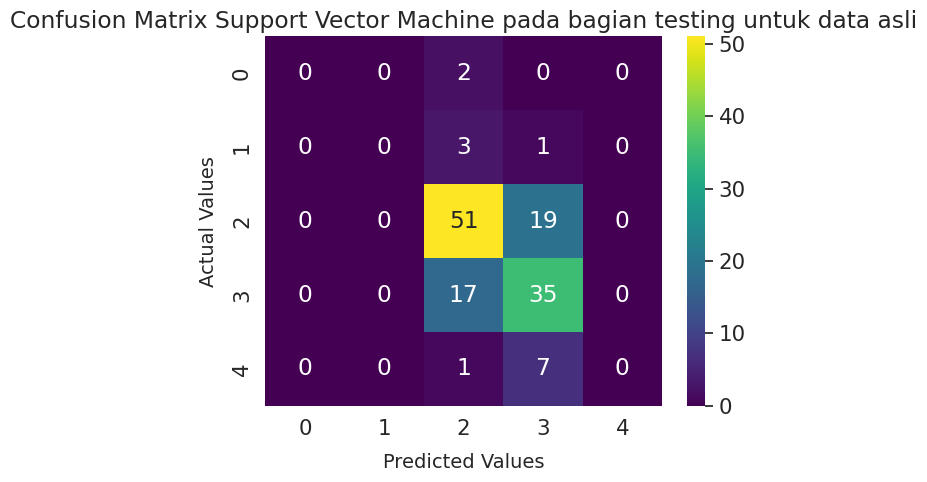

In [102]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_svm_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix Support Vector Machine pada bagian testing untuk data asli')
plt.show()

K-Nearest Neighbor (KNN)

In [103]:
ori_classifier_knn = GridSearchCV(classifier_knn_pipeline, parameters_knn, cv=3, n_jobs=-1)

In [104]:
ori_classifier_knn.fit(X_train,Y_train.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('model', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'model__n_neighbors': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])})

In [105]:
ori_classifier_knn.best_estimator_

Pipeline(steps=[('model', KNeighborsClassifier(n_neighbors=22))])

In [106]:
for param_name in sorted(parameters_knn.keys()):
    print('%s: %r' %(param_name,ori_classifier_knn.best_params_[param_name]))

model__n_neighbors: 22


In [107]:
ori_y_pred_knn_train = ori_classifier_knn.predict(X_train)

In [108]:
ori_accuracy_knn_train = accuracy_score(Y_train,ori_y_pred_knn_train)
print('Akurasi pada training set: ', ori_accuracy_knn_train)

ori_precision_knn_train = precision_score(Y_train,ori_y_pred_knn_train, average='micro')
print('Precision pada training set: ', ori_precision_knn_train)

ori_recall_knn_train = recall_score(Y_train,ori_y_pred_knn_train, average='micro')
print('Recall pada training set: ', ori_recall_knn_train)

ori_y_pred_knn_test = ori_classifier_knn.predict(X_test)

ori_accuracy_knn_test = accuracy_score(Y_test,ori_y_pred_knn_test)
print('Akurasi pada test set: ', ori_accuracy_knn_test)

ori_precision_knn_test = precision_score(Y_test,ori_y_pred_knn_test, average='micro')
print('Precision pada test set: ', ori_precision_knn_test)

ori_recall_knn_test = recall_score(Y_test,ori_y_pred_knn_test, average='micro')
print('Recall pada test set: ', ori_recall_knn_test)

Akurasi pada training set:  0.5633687653311529
Precision pada training set:  0.5633687653311529
Recall pada training set:  0.5633687653311529
Akurasi pada test set:  0.49264705882352944
Precision pada test set:  0.49264705882352944
Recall pada test set:  0.49264705882352944


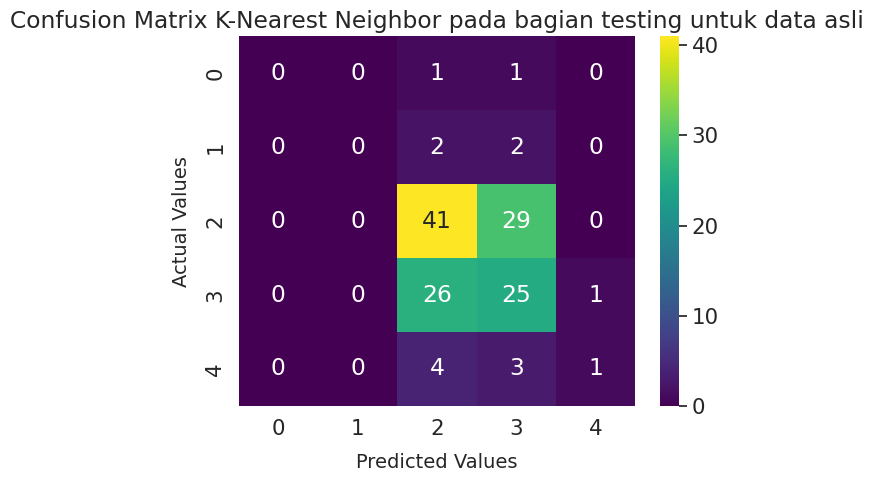

In [109]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_knn_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix K-Nearest Neighbor pada bagian testing untuk data asli')
plt.show()

Naive Bayes (NB)

In [110]:
ori_classifier_nb = GridSearchCV(classifier_nb_pipeline, parameters_nb, cv=3, n_jobs=-1)

In [111]:
ori_classifier_nb.fit(X_train, Y_train.ravel())

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


GridSearchCV(cv=3, estimator=Pipeline(steps=[('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])})

In [112]:
ori_classifier_nb.best_estimator_

Pipeline(steps=[('model', MultinomialNB(alpha=0.0))])

In [113]:
for param_name in sorted(parameters_nb.keys()):
    print('%s: %r' %(param_name,ori_classifier_nb.best_params_[param_name]))

model__alpha: 0.0


In [114]:
ori_y_pred_nb_train = ori_classifier_nb.predict(X_train)

In [115]:
ori_accuracy_nb_train = accuracy_score(Y_train,ori_y_pred_nb_train)
print('Akurasi pada training set: ', ori_accuracy_nb_train)

ori_precision_nb_train = precision_score(Y_train,ori_y_pred_nb_train, average='micro')
print('Precision pada training set: ', ori_precision_nb_train)

ori_recall_nb_train = recall_score(Y_train,ori_y_pred_nb_train, average='micro')
print('Recall pada training set: ', ori_recall_nb_train)

ori_y_pred_nb_test = ori_classifier_nb.predict(X_test)

ori_accuracy_nb_test = accuracy_score(Y_test,ori_y_pred_nb_test)
print('Akurasi pada test set: ', ori_accuracy_nb_test)

ori_precision_nb_test = precision_score(Y_test,ori_y_pred_nb_test, average='micro')
print('Precision pada test set: ', ori_precision_nb_test)

ori_recall_nb_test = recall_score(Y_test,ori_y_pred_nb_test, average='micro')
print('Recall pada test set: ', ori_recall_nb_test)

Akurasi pada training set:  0.45053147996729354
Precision pada training set:  0.45053147996729354
Recall pada training set:  0.45053147996729354
Akurasi pada test set:  0.41911764705882354
Precision pada test set:  0.41911764705882354
Recall pada test set:  0.41911764705882354


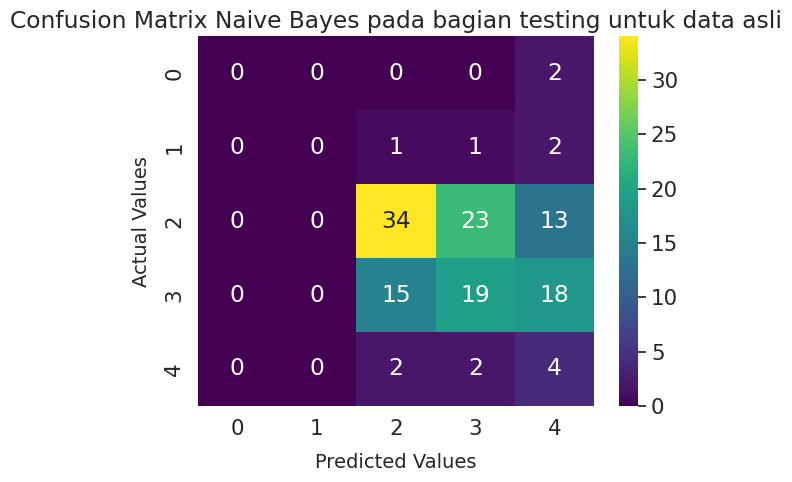

In [116]:
sns.heatmap(confusion_matrix(Y_test,ori_y_pred_nb_test),annot=True,cmap='viridis', fmt='.0f')
plt.xlabel('Predicted Values', fontdict={'size':14}, labelpad=10)
plt.ylabel('Actual Values', fontdict={'size':14}, labelpad=10)
plt.title('Confusion Matrix Naive Bayes pada bagian testing untuk data asli')
plt.show()

### **Result**

In [117]:
models = [
          ('Machine Learning Data Decision Tree', ori_accuracy_dt_train, ori_accuracy_dt_test),
          ('Machine Learning Data Support Vector Machine', ori_accuracy_svm_train, ori_accuracy_svm_test),
          ('Machine Learning Data K-Nearest Neighbor', ori_accuracy_knn_train, ori_accuracy_knn_test),
          ('Machine Learning Data Naive Bayes', ori_accuracy_nb_train, ori_accuracy_nb_test)
         ]

In [118]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Machine Learning Data Decision Tree,0.663123,0.617647
1,Machine Learning Data Support Vector Machine,0.574816,0.632353
2,Machine Learning Data K-Nearest Neighbor,0.563369,0.492647
3,Machine Learning Data Naive Bayes,0.450531,0.419118


In [119]:
models_comparison = [
                        ('Machine Learning Decision Tree', ori_accuracy_dt_test, ori_recall_dt_test, ori_precision_dt_test),
                        ('Machine Learning Support Vector Machine',ori_accuracy_svm_test, ori_recall_svm_test, ori_precision_svm_test),
                        ('Machine Learning K-Nearest Neighbor',ori_accuracy_knn_test, ori_recall_knn_test, ori_precision_knn_test),
                        ('Machine Learning Naive Bayes',ori_accuracy_nb_test, ori_recall_nb_test, ori_precision_nb_test)
                    ]

In [120]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision'])
comparison

,Model,Accuracy,Recall,Precision
0,Machine Learning Decision Tree,0.617647,0.617647,0.617647
1,Machine Learning Support Vector Machine,0.632353,0.632353,0.632353
2,Machine Learning K-Nearest Neighbor,0.492647,0.492647,0.492647
3,Machine Learning Naive Bayes,0.419118,0.419118,0.419118


<ipython-input-121-f775cc0807ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
<ipython-input-121-f775cc0807ae>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])


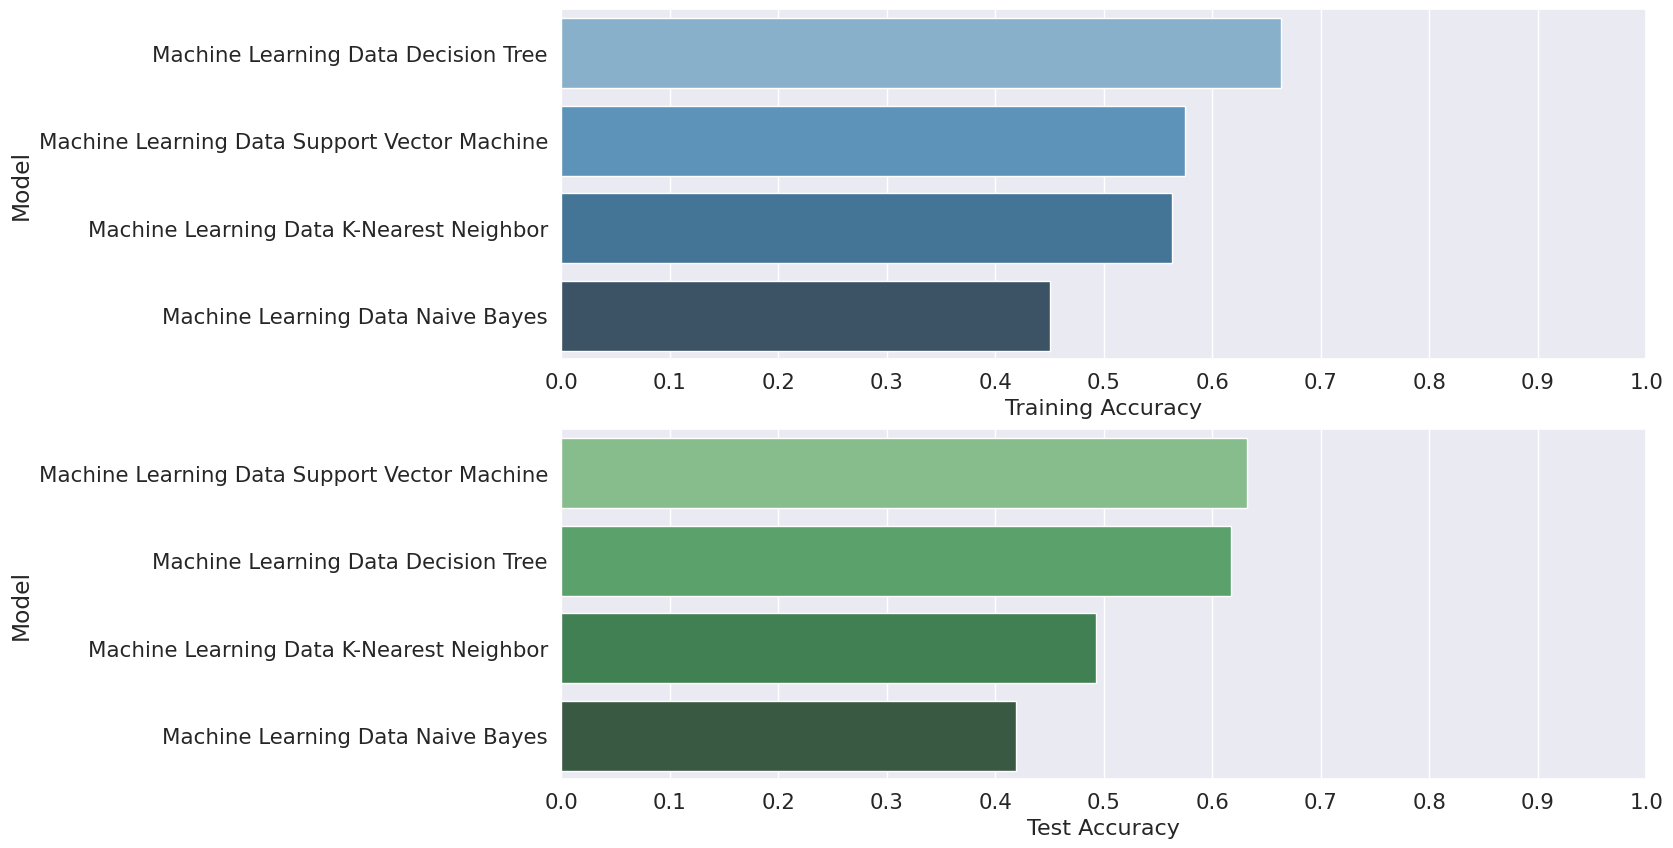

In [121]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()